In [64]:
import pandas as pd
from multiprocessing import Pool
import datetime
import json
import concurrent
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

number_of_lines_per_patch = 1000
count = 0
def process_book(reviews: list[dict]):
    result = []
    for review in reviews:
        user_id = review['user_id']
        book_id = review['book_id'] 
        rating = review['rating']
        date_added = review['date_added']
        n_votes = review['n_votes']
        n_comments = review['n_comments']    
        try:
            book_id = int(book_id)
            rating = int(rating)
            n_votes = int(n_votes)
            n_comments = int(n_comments)
            date_added = int(date_added[-4:])
            result.append( {
                'book_id':book_id,
                'user_id':user_id,
                'rating': rating,
                'date_added': date_added,
                'n_votes': n_votes,
                'n_comments': n_comments
            }
        )
        except Exception:
            continue
    return result
        
futures = []
with open('dataset/goodreads_reviews_dedup.json',"r") as jsonfile:
    with concurrent.futures.ThreadPoolExecutor(1000) as executor:
        while True:
            try:
                lines = [json.loads(next(jsonfile)) for _ in range(number_of_lines_per_patch)]
            except Exception:
                break
            if len(lines) == 0:
                break
            
            futures.append(executor.submit(process_book, lines))
            count += 1
            if(count%100 == 0):
                print(count)
        print(count)

all_edges = [v for f in futures for v in f.result()]

interactions = pd.DataFrame(all_edges) 
interactions.to_csv('dataset/reviews.csv')

In [32]:
interactions = pd.read_csv("dataset/reviews.csv")
interactions.describe()

Unnamed: 0       book_id        rating    date_added       n_votes  \
count  1.573900e+07  1.573900e+07  1.573900e+07  1.573900e+07  1.573900e+07   
mean   7.869500e+06  1.305795e+07  3.770127e+00  2.013695e+03  1.161129e+00   
std    4.543458e+06  1.034329e+07  1.256282e+00  2.424397e+00  9.021618e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.092000e+03 -3.000000e+00   
25%    3.934750e+06  2.173076e+06  3.000000e+00  2.012000e+03  0.000000e+00   
50%    7.869500e+06  1.281456e+07  4.000000e+00  2.014000e+03  0.000000e+00   
75%    1.180425e+07  2.144848e+07  5.000000e+00  2.016000e+03  1.000000e+00   
max    1.573900e+07  3.652931e+07  5.000000e+00  2.017000e+03  1.669500e+04   

         n_comments  
count  1.573900e+07  
mean   3.056496e-01  
std    2.611290e+00  
min   -1.500000e+01  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.632000e+03

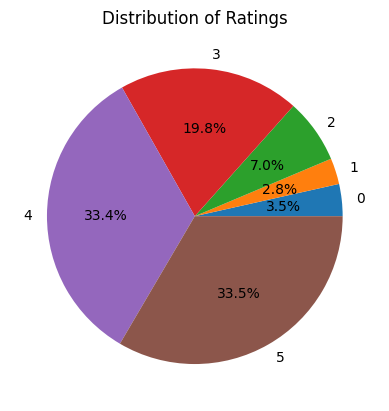

In [37]:
ratings = [x[0] for x in interactions.groupby('rating').count().values]
labels = [i for i in range(0,6)]

ratings


# y = n
plt.pie(ratings, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

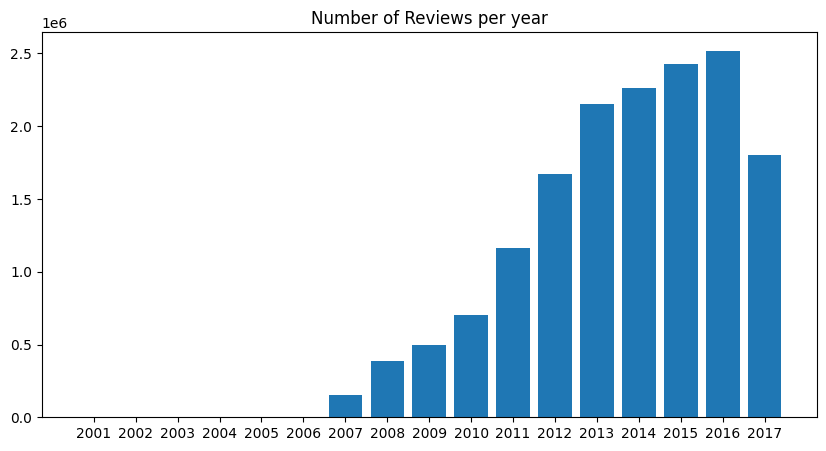

In [50]:
values = [x[0] for x in interactions.groupby('date_added').count().values][3:]
keys = [str(i) for i in range(2001, 2018)]
# labels = [i for i in range(0,6)]

ratings


# y = n
plt.figure(figsize=(10,5))
plt.bar(keys, values)
plt.title('Number of Reviews per year')
plt.show()

In [54]:
interactions.groupby('user_id').count().mean()

Unnamed: 0    33.834578
book_id       33.834578
rating        33.834578
date_added    33.834578
n_votes       33.834578
n_comments    33.834578
dtype: float64

[21811, 10055, 9517, 7940, 7765, 7556, 7054, 5531, 5347, 5345, 5192, 5096, 4991, 4978, 4948, 4842, 4655, 4525, 4468, 4271, 4000, 3848, 3817, 3804, 3776, 3666, 3644, 3573, 3513, 3510, 3488, 3445, 3317, 3310, 3307, 3287, 3280, 3266, 3261, 3223, 3139, 3121, 3049, 2982, 2966, 2951, 2922, 2913, 2904, 2901, 2897, 2894, 2878, 2868, 2867, 2830, 2823, 2817, 2802, 2787, 2771, 2768, 2753, 2745, 2731, 2720, 2710, 2704, 2672, 2669, 2658, 2634, 2631, 2619, 2618, 2612, 2611, 2608, 2605, 2605, 2598, 2582, 2567, 2557, 2532, 2523, 2491, 2491, 2488, 2484, 2469, 2446, 2444, 2442, 2435, 2431, 2417, 2417, 2415, 2412, 2412, 2392, 2380, 2374, 2372, 2370, 2366, 2365, 2364, 2357, 2344, 2332, 2331, 2314, 2314, 2287, 2284, 2281, 2278, 2276, 2260, 2258, 2252, 2242, 2240, 2238, 2226, 2224, 2216, 2204, 2191, 2187, 2176, 2170, 2162, 2161, 2160, 2158, 2155, 2155, 2150, 2140, 2140, 2130, 2122, 2120, 2116, 2109, 2094, 2094, 2093, 2092, 2086, 2081, 2068, 2054, 2047, 2043, 2042, 2035, 2031, 2027, 2023, 2022, 2022, 2016, 2

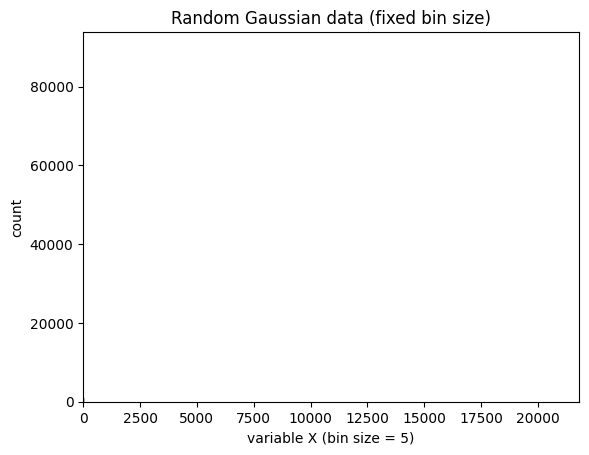

In [87]:
import math

values = sorted((x[0] for x in interactions.groupby('user_id').count().values), reverse=True)
print(values)

bins = np.arange(0, 100, 1)

plt.xlim([min(values)-5, max(values)+5])

plt.hist(values, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

number of users

In [31]:
len(set(list(interactions['user_id'])))

465175

In [50]:
interactions = interactions.loc[(interactions['rating'] > 3) & (interactions['date_added'] >= 2007) & (2017 > interactions['date_added'])]
# interactions = interactions.sample(1000000)
interactions

Unnamed: 0   book_id                           user_id  rating  \
8                  8  29893493  8842281e1d1347389f2ab93d60773d4d       5   
9                  9  28114110  8842281e1d1347389f2ab93d60773d4d       4   
11                11   8191070  8842281e1d1347389f2ab93d60773d4d       5   
14                14  32768285  8842281e1d1347389f2ab93d60773d4d       5   
16                16  16064871  8842281e1d1347389f2ab93d60773d4d       5   
...              ...       ...                               ...     ...   
15738994    15738994   7937843  04938d7a33a3fb6b4224fd4e4ee6d119       5   
15738995    15738995  13147091  04938d7a33a3fb6b4224fd4e4ee6d119       4   
15738996    15738996  17333223  6fd7b24d8ed1cdb89b9e52cd6ca9c0e2       4   
15738998    15738998     10614  2c468b4a7c7b836f4dc60a875a536a74       5   
15738999    15738999      7673  2c468b4a7c7b836f4dc60a875a536a74       5   

          date_added  n_votes  n_comments  
8               2016       29           8  
9               2016       14           0  
11              2016       25           0  
14              2016       16           1  
16              2016        6           0  
...              ...      ...         ...  
15738994        2012        0           0  
15738995        2012        0           0  
15738996        2013        0           0  
15738998        2007        0           0  
15738999        2007        0           0  

[9276467 rows x 7 columns]

Filter out books with less than 3 reviews

In [51]:
book_groups = interactions.groupby('book_id').user_id.count()
print(len(book_groups))
filtered_book_ids = book_groups[book_groups>2].index.tolist()
print(len(filtered_book_ids))
interactions = interactions.loc[interactions['book_id'].isin(filtered_book_ids)]
interactions

1417805
451663


Unnamed: 0   book_id                           user_id  rating  \
9                  9  28114110  8842281e1d1347389f2ab93d60773d4d       4   
11                11   8191070  8842281e1d1347389f2ab93d60773d4d       5   
16                16  16064871  8842281e1d1347389f2ab93d60773d4d       5   
17                17  28119237  8842281e1d1347389f2ab93d60773d4d       4   
18                18  30282601  8842281e1d1347389f2ab93d60773d4d       4   
...              ...       ...                               ...     ...   
15738994    15738994   7937843  04938d7a33a3fb6b4224fd4e4ee6d119       5   
15738995    15738995  13147091  04938d7a33a3fb6b4224fd4e4ee6d119       4   
15738996    15738996  17333223  6fd7b24d8ed1cdb89b9e52cd6ca9c0e2       4   
15738998    15738998     10614  2c468b4a7c7b836f4dc60a875a536a74       5   
15738999    15738999      7673  2c468b4a7c7b836f4dc60a875a536a74       5   

          date_added  n_votes  n_comments  
9               2016       14           0  
11              2016       25           0  
16              2016        6           0  
17              2016       30           2  
18              2016       18           1  
...              ...      ...         ...  
15738994        2012        0           0  
15738995        2012        0           0  
15738996        2013        0           0  
15738998        2007        0           0  
15738999        2007        0           0  

[8090332 rows x 7 columns]

### Choose Active Users
choose users that have been active in the last year, so that our analysis become more reliable particularly to evaluate our recommendation system.
###### Todo: adjust the final random sampling (20000)

In [52]:
import random

latest_interactions = interactions.loc[interactions['date_added'] == 2016]
active_users = sorted(set(latest_interactions['user_id']))
print(len(active_users))
random.seed(4423)
active_users = random.sample(active_users, 5000)

interactions = interactions.loc[interactions['user_id'].isin(active_users)]
interactions

161323


Unnamed: 0   book_id                           user_id  rating  \
3893            3893  30846960  f88032f4ad97b46654fe59ce3387cf5d       5   
3894            3894  28897834  f88032f4ad97b46654fe59ce3387cf5d       5   
3896            3896  29241276  f88032f4ad97b46654fe59ce3387cf5d       5   
3897            3897  30657877  f88032f4ad97b46654fe59ce3387cf5d       4   
3898            3898  31695676  f88032f4ad97b46654fe59ce3387cf5d       5   
...              ...       ...                               ...     ...   
15738259    15738259  18739537  c870c0587538fe88c77b4f5dd9c34087       5   
15738261    15738261  12935765  c870c0587538fe88c77b4f5dd9c34087       5   
15738262    15738262    259764  c870c0587538fe88c77b4f5dd9c34087       4   
15738263    15738263    563797  c870c0587538fe88c77b4f5dd9c34087       5   
15738264    15738264    410259  c870c0587538fe88c77b4f5dd9c34087       5   

          date_added  n_votes  n_comments  
3893            2016        4           0  
3894            2016        2           0  
3896            2016        3           0  
3897            2016        3           0  
3898            2016        1           0  
...              ...      ...         ...  
15738259        2016        0           0  
15738261        2015        0           0  
15738262        2014        1           0  
15738263        2012        0           1  
15738264        2012        1           0  

[200266 rows x 7 columns]

In [29]:
dates = interactions.groupby('date_added')
dates.count()

Unnamed: 0  book_id  user_id   rating  n_votes  n_comments
date_added                                                            
1092                 1        1        1        1        1           1
1943                 1        1        1        1        1           1
2000                 1        1        1        1        1           1
2001                58       58       58       58       58          58
2002                33       33       33       33       33          33
2003                50       50       50       50       50          50
2004                48       48       48       48       48          48
2005               258      258      258      258      258         258
2006               564      564      564      564      564         564
2007            149998   149998   149998   149998   149998      149998
2008            387917   387917   387917   387917   387917      387917
2009            498111   498111   498111   498111   498111      498111
2010            700226   700226   700226   700226   700226      700226
2011           1166143  1166143  1166143  1166143  1166143     1166143
2012           1673837  1673837  1673837  1673837  1673837     1673837
2013           2152848  2152848  2152848  2152848  2152848     2152848
2014           2260782  2260782  2260782  2260782  2260782     2260782
2015           2426593  2426593  2426593  2426593  2426593     2426593
2016           2519247  2519247  2519247  2519247  2519247     2519247
2017           1802284  1802284  1802284  1802284  1802284     1802284

### Remove Books Reviewed by few users
To create a stringly connected network we prevent crreation of completely isolated partitions in users network ignorng books that are liked by less than 3 users

In [59]:
book_groups = interactions.groupby('book_id').user_id.count()
print(len(book_groups))
filtered_book_ids = book_groups[book_groups>2].index.tolist()
print(len(filtered_book_ids))
interactions = interactions.loc[interactions['book_id'].isin(filtered_book_ids)]
interactions

29922
13882


Unnamed: 0   book_id                           user_id  rating  \
3904            3904  28439219  f88032f4ad97b46654fe59ce3387cf5d       5   
3952            3952  24513660  f88032f4ad97b46654fe59ce3387cf5d       5   
3963            3963  21957948  f88032f4ad97b46654fe59ce3387cf5d       5   
3973            3973  18689577  f88032f4ad97b46654fe59ce3387cf5d       5   
3999            3999  18387597  f88032f4ad97b46654fe59ce3387cf5d       4   
...              ...       ...                               ...     ...   
15733084    15733084     10210  bdb1b1e3d8579811e4a2952a986aaa8d       5   
15734164    15734164  30247358  6e43b1392017f5adb9cc7f06b2d12b08       4   
15734934    15734934  24727094  76b51c89152d50ec282bc16686bc2ef2       5   
15736482    15736482      1885  b8b204ef214a54d77e03ac5afec51100       5   
15736485    15736485  10414941  b8b204ef214a54d77e03ac5afec51100       5   

          date_added  n_votes  n_comments  
3904            2016        1           0  
3952            2015        2           0  
3963            2014        2           0  
3973            2014        9           2  
3999            2013        0           0  
...              ...      ...         ...  
15733084        2012        0           0  
15734164        2016        0           0  
15734934        2016        1           0  
15736482        2016        0           0  
15736485        2013        0           0  

[94715 rows x 7 columns]

In [60]:
grouped = interactions.groupby('book_id')
print(grouped.count())

          Unnamed: 0  user_id  rating  date_added  n_votes  n_comments
book_id                                                               
1                 56       56      56          56       56          56
2                 53       53      53          53       53          53
3                136      136     136         136      136         136
5                 71       71      71          71       71          71
6                 70       70      70          70       70          70
...              ...      ...     ...         ...      ...         ...
33860984           4        4       4           4        4           4
34044126           3        3       3           3        3           3
34273458           5        5       5           5        5           5
34826911           3        3       3           3        3           3
35247769           6        6       6           6        6           6

[13882 rows x 6 columns]


## Network Construction
Create the graph in which users constitute the nodes. Two users that have rated the same book with 4 or 5 stars are connected through a link.

In [61]:
# %%script false --no-raise-error

import concurrent.futures
import networkx as nx
import time

G = nx.Graph()

def process_group(group_name, group_df):
    print(f"{group_name} started")
    t = time.time()
    edges = []
    ll = group_df['user_id'].tolist()
    for i in range(len(ll) - 1):
        for j in range(i + 1, len(ll)):
            edges.append((ll[i], ll[j]))
    
    elapsed_time = time.time() - t
    print(f"{group_name} with {len(group_df)} took {elapsed_time:.3f} seconds")
    return edges

with concurrent.futures.ThreadPoolExecutor(1000) as executor:
    # Submit each group to the executor
    futures = [executor.submit(process_group, group_name, group_df) for group_name, group_df in grouped]

# Wait for all tasks to complete
concurrent.futures.wait(futures)

all_edges = set(v for f in futures for v in f.result())
print(len(all_edges))
G.add_edges_from(all_edges)


1 started
1 with 56 took 0.000 seconds
2 started
2 with 53 took 0.001 seconds
3 started
3 with 136 took 0.002 seconds
5 started
5 with 71 took 0.001 seconds
6 started
6 with 70 took 0.001 seconds
11 started
11 with 35 took 0.000 seconds
13 started
13 with 6 took 0.000 seconds
21 started
21 with 16 took 0.000 seconds
24 started
24 with 3 took 0.000 seconds
25 started
25 with 5 took 0.000 seconds
27 started
27 with 5 took 0.000 seconds
28 started
28 with 5 took 0.001 seconds
29 started
29 with 3 took 0.000 seconds
33 started
33 with 24 took 0.000 seconds
34 started
34 with 26 took 0.000 seconds
50 started
50 with 5 took 0.000 seconds
67 started
67 with 3 took 0.000 seconds
93 started
93 with 9 took 0.000 seconds
98 started
98 with 3 took 0.000 seconds
122 started
122 with 4 took 0.000 seconds
151 started
151 with 6 took 0.000 seconds
152 started
152 with 9 took 0.000 seconds
264 started
264 with 3 took 0.000 seconds
275 started
275 with 6 took 0.000 seconds
295 started
295 with 7 took 0.

In [19]:
print(G.number_of_edges())
print(G.number_of_nodes())
print((G.number_of_edges()*2)/G.number_of_nodes())
print(G.number_of_nodes() * (G.number_of_nodes()-1) /2)

627333
4513
278.0115222690007
10181328.0


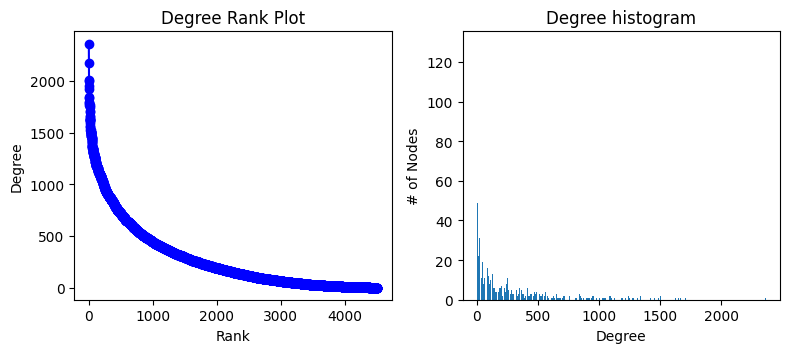

In [63]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

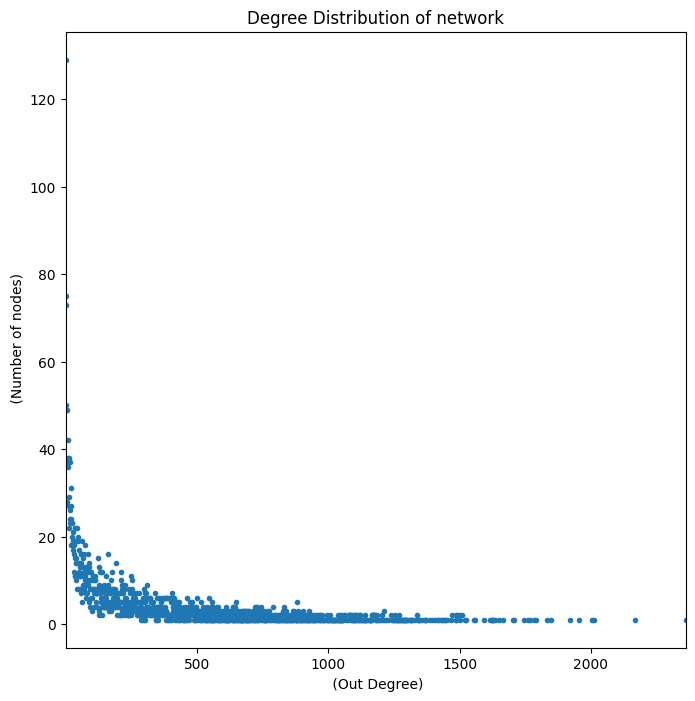

In [74]:
import numpy as np
import matplotlib.pyplot as plt


out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(8,8))
plt.xlim(min(x), max(x))
plt.xlabel(' (Degree)')
plt.ylabel(' (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(x, y, '.')

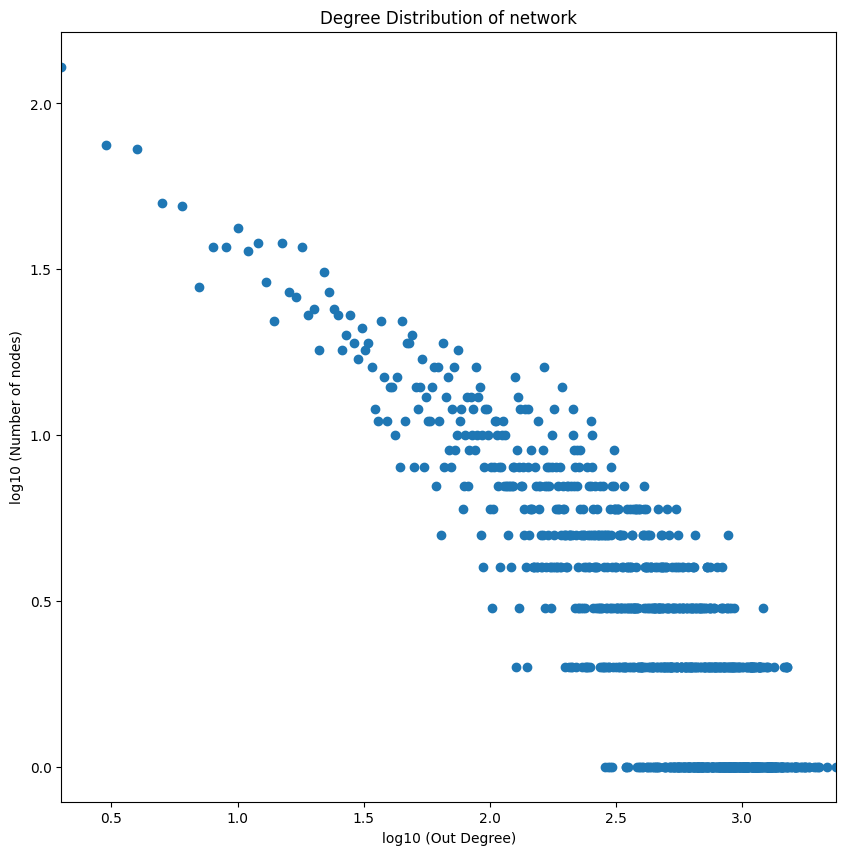

In [65]:
## degree Distribution
import numpy as np
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(logx, logy, 'o')

In [66]:
nx.write_edgelist(G, 'dataset/users.edgelist.gz')

In [3]:
G = nx.read_edgelist('dataset/users.edgelist.gz')

In [4]:
G_2017 = nx.read_edgelist('dataset/users_2017.edgelist.gz')

## Components

In [90]:
connected_components = list(nx.connected_components(G))
print(len(connected_components))

1


### louvain_communities

#### find the best seed for louvain_communities

In [8]:
from networkx.algorithms.community import louvain_communities, modularity

scores = {}
for i in range(0, 10000):
    seed  = random.randint(0,99999999)
    c = louvain_communities(G, seed=seed, threshold=0)
    x = modularity(G, c, weight = None)
    scores[seed] = x
    print('seed:', seed, 'modularity:', x, '#:', len(c))

seed: 1294152 modularity: 0.1992152868506327 #: 7
seed: 24942848 modularity: 0.19450300721772254 #: 7
seed: 74735900 modularity: 0.19936418016382473 #: 7
seed: 28166001 modularity: 0.19596838949616707 #: 8
seed: 99707988 modularity: 0.1937418757550209 #: 7
seed: 66635875 modularity: 0.19025268850529523 #: 6
seed: 71958972 modularity: 0.1893916637930495 #: 6
seed: 48162808 modularity: 0.1986611051653568 #: 7
seed: 83350862 modularity: 0.19022023888691258 #: 6
seed: 73250880 modularity: 0.19622065214198228 #: 7
seed: 335605 modularity: 0.19735305234265096 #: 7
seed: 84567418 modularity: 0.19742819806369083 #: 7
seed: 82594335 modularity: 0.19788240118298986 #: 7
seed: 79100097 modularity: 0.19951687428395282 #: 7
seed: 64085811 modularity: 0.19285244192334408 #: 6
seed: 98573740 modularity: 0.1934306925886703 #: 7
seed: 3185196 modularity: 0.19730036154668018 #: 8
seed: 30071804 modularity: 0.1921954497603508 #: 6
seed: 19355929 modularity: 0.1973565345635024 #: 8
seed: 97989610 modulari

KeyboardInterrupt: 

In [9]:
best_seed = sorted(scores.items(), key=lambda item: item[1], reverse=True)[0][0]
# best_seed = 79350324
best_seed

79100097

In [10]:
from networkx.algorithms.community import louvain_communities, modularity
communities = louvain_communities(G, seed=best_seed, threshold=0)
len(communities)

7

In [11]:
communities = [c for c in communities if len(c)>10]

In [12]:
for c in communities:
    print(len(c))

648
269
1107
73
263
2041
112


In [13]:
modularity(G, communities, weight = None)

0.19951687428395282

In [14]:
for comm_id, comm_nodes in enumerate(communities):
    for node in comm_nodes:
        G.nodes[node]["community"] = comm_id

### girvan_newman

In [52]:
from networkx.algorithms.community import girvan_newman, modularity
import itertools
import datetime

prev_modularity = -1


def should_continue(c):
    global prev_modularity
    new_modularity = modularity(G, list(c), weight = None)
    print('comparing', prev_modularity, new_modularity)
    if new_modularity > prev_modularity + 0.000001:
        prev_modularity = new_modularity
        return True
    else:
        return False

gn_community = girvan_newman(G)
# len(communities)
# for x in communities:
#     print(type(x))
# tuple(len(c) for c in next(communities))
# next(communities)

limited = itertools.takewhile(should_continue, gn_community)
final_communities = []
count = 0
print('starting...')
for comm in limited: 
    final_communities = list(comm)
    count += 1
    print(count, datetime.datetime.now(), len(final_communities))

print('final', modularity(G, final_communities, weight = None))
len(final_communities)

starting...
comparing -1 2.6743581205292972e-06
1 2024-02-28 23:14:56.375350 2
comparing 2.6743581205292972e-06 5.348701936612078e-06
2 2024-02-28 23:47:11.063567 3
comparing 5.348701936612078e-06 8.022999262840974e-06
3 2024-02-29 00:51:33.127715 4
comparing 8.022999262840974e-06 8.022970653673112e-06
final 8.022999262840974e-06


4

In [88]:
modularity(G, final_communities, weight = None)

8.022999262840974e-06

### Plot Communities

In [104]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 3: Create a color map for the communities
colors = []

# Create a mapping of node to color
node_color = {}

for i, comm in enumerate(communities):
    for node in comm:
        node_color[node] = i
# for color, node in zip(colors, G.nodes()):
#     node_color[node] = color

# # Step 4: Draw the graph with community colors
# plt.figure(figsize=(10, 7))
# nx.draw_networkx(G, node_color=[node_color[node] for node in G.nodes()], with_labels=False, node_size=100, cmap=plt.cm.jet)
# plt.show()

In [105]:
node_colors = [node_color[node] for node in G.nodes()]
set(node_colors)

{0, 1, 2, 3, 4, 5, 6}

In [106]:
import math

# pos = nx.spring_layout(G, seed=42)  # Increase node separation
pos = {}
angle = math.pi * 2 / len(communities)

for comm_id, comm_nodes in enumerate(communities):
    for node in comm_nodes:
        pos[node] = (math.cos(comm_id * angle) + random.random()/2.0 - 0.25, math.sin(comm_id * angle) + random.random()/2.0 - 0.25)
nx.set_edge_attributes(G, name="concentrate", values=True)  # Enable edge concentration

In [125]:
edge_colors = []
num_intera_cluster, num_within_cluster = 0, 0
for edge in list(G.edges()):
    i = [i for i, comm in enumerate(communities) if edge[0] in comm]
    j = [i for i, comm in enumerate(communities) if edge[1] in comm]
    if i==j:
        num_within_cluster += 1
    else:
        num_intera_cluster += 1
    edge_colors.append('#000000' if i==j else '#ff0000')
print(num_intera_cluster, num_within_cluster)

336119 291214


In [ ]:
# pos = {}
# for comm_id, comm_nodes in enumerate(communities):
#     for node in comm_nodes:
#         pos[node] = (comm_id + random.random()/2.0 - 0.25, random.random())
# nx.set_edge_attributes(G, name="concentrate", values=True)  # Enable edge concentration

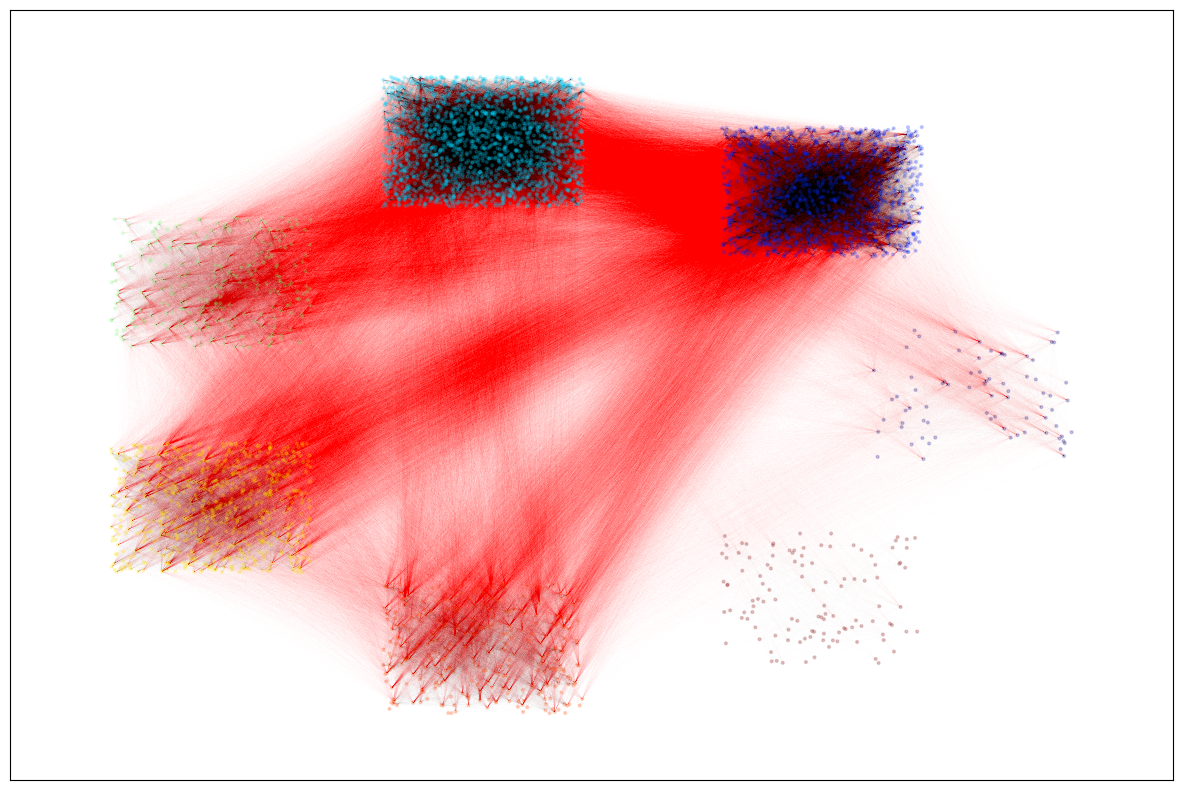

In [126]:

plt.figure(figsize=(15, 10))
nx.draw_networkx(
    G,
    pos=pos,
    nodelist=node_color.keys(),
    node_color=list(node_color.values()),
    with_labels=False,
    node_size=4,
    cmap=plt.cm.jet,
    font_size=8,
    font_color="white",
    width = 0.006,
    alpha = 0.2,
    edge_color=edge_colors
)
plt.show()

### Modularity

In [12]:
nx.community.modularity(G, communities, weight=None)

0.18152493035405937

the number of edges within groups exceeds the expected number. however, it is less than 0.3, so it does not mean significant community structure

### Diameter of the Network

In [ ]:
nx.shortest_path_length(G, source=list(G.nodes())[1000])

In [129]:
from  concurrent.futures import ThreadPoolExecutor, as_completed
import networkx as nx
from tqdm import tqdm

def compute_shortest_path(node):
    sps = nx.shortest_path_length(G, source=node)
    del sps[node]
    # print(node, 'done.')
    return (node, sps)

# pbar = tqdm(total=G.number_of_nodes())  # Init pbar

with ThreadPoolExecutor() as executor:
    # Submit each group to the executor
    futures = executor.map(compute_shortest_path, G.nodes())
    print('Jobs created.')
    results = list(tqdm(futures, total=G.number_of_nodes()))

print('here2')
shortest_paths = dict(r for r in results)
print('here3')
print(len(shortest_paths))

Jobs created.


100%|██████████| 4513/4513 [06:12<00:00, 12.12it/s]  

here2
here3
4513


Network Diameter:

In [130]:
diameter = 0
sum = 0
count = 0
for targets in shortest_paths.values():
    for length in targets.values():
        sum += length
        count += 1
        if length > diameter:
            diameter = length
print('average path lenght:', sum/count)
print('Diameter:', diameter)

average path lenght: 2.1636649953719203
Diameter: 5


In [ ]:
# p = dict(nx.shortest_path_length(G))
# p

In [ ]:
# diameter = nx.diameter(G)

### Clustering Coefficient

In [131]:
clustering = nx.clustering(G)
clustering

{'613b47964dbacb8f76fde8e4c27a1c06': 0.3325051317139925,
 'd950574a6b2d8ef14020c6d9dab8de6c': 0.7377690802348337,
 'e74e65874672e661b46da192e9068e14': 0.41360046308706583,
 'b7c6920799368c034366ade3f737c9e8': 0.28981622800574647,
 '4cf7f99440281f9ea0ea7398a54cd227': 0.3979237770193402,
 'bb1e86378939c95dc9209a963b6cb086': 0.5024827024827024,
 'dfb5b62fbd924d96758f24323527845e': 0.28247985658783675,
 '987399330fee388513075c10b982dd11': 0.3676409722921351,
 '1b34ccce812160cfa34692bc53489823': 0.6108035313481969,
 'e95eaa36654073c1c7353e3838253d40': 1.0,
 '6b0eb239abb8cf64ab5d5580cdb5c38c': 0.2742480740247029,
 'dceb4807abd7b25483354deaf817abe2': 0.229761587425821,
 '6a18d2ae3a1beaab37b869dc3a5aa5a9': 0.32738999832271903,
 '2c24a24ea42326f2071a34fd69b35135': 0.372992299229923,
 '38e202aa76a8884f9da871e21a41fbf3': 0.28424193014687943,
 '2c55a3bbbda3fe410cd0a9d30008d615': 0.6964569011105235,
 '6cb0f457e2e823642bb467fb77624e87': 0.576598159122431,
 '630f1c10f4e76be80e44500189d28ad0': 0.30437

In [132]:
sum = 0
count = 0
for cc in clustering.values():
    sum += cc
    count += 1
print('average Clustering Coefficient:', sum/count)

average Clustering Coefficient: 0.635725616706285


### Power Law

In [107]:
G.degree()

DegreeView({'10545055a446a513b56df60013976283': 1075, '1b195ea4db9c35ddce192a92de0dac1a': 1202, '78e3e18447a4adba95f7d20760d74d5f': 1082, '813957808d9bfe72bbc653ceb012a821': 282, '3bfec68bc1176ca9a81c2fbd69cafedb': 1072, 'cf2d20d9904a3b93fe8e32763483153f': 1309, 'e021b024b020b226471d33612bcc7f74': 312, 'efe474053a6016351885ebd3a038982d': 365, '75f4a47456099ade341023540e135eab': 264, '637e14c1407eac8e17fb51cfb6109bc3': 38, '771ff98572cd99ab4a6cf3ff81989615': 1353, 'e7ebf9fd8e9dabdb63f592488db38287': 753, 'dca22ada5bbe0aa926614eff644315d8': 856, '1cd55882a518421226bd495e7aa34e2a': 26, '49c9fbda27c2694b9ce1203e490499ff': 1855, 'de5cb7006ec99cdb1e1db1d411855966': 885, '60f9a8618cb784de18ea38901374c58b': 1792, '498a67ded36448a8972cfb0a6b4cc7a4': 250, '87f18aceb6eb551b1e5f72b1a67c13ac': 393, '469a125c5c74ecb5c2d9223a20bdb0f6': 1178, '0ee18750485fb85da47e334a6bfac655': 1230, 'cc50e6814eca19d5fd87dbeb910dfbdd': 481, '5110ad384f9fa4d1a2f557750676d777': 837, '1370ed340c7f4c5ff94a126691c9234e': 6

In [75]:
max_degree = max(list(dict(G.degree()).values()))
max_degree


2360

In [76]:
P_K = [0] * (max_degree+1)
for degree in list(dict(G.degree()).values()):
    P_K[degree] += 1 / G.number_of_nodes()
P_K

[0,
 0,
 0.028584090405495154,
 0.016618657212497234,
 0.016175493020163977,
 0.011079104808331493,
 0.010857522712164863,
 0.006204298692665635,
 0.008198537558165304,
 0.008198537558165304,
 0.009306448038998454,
 0.007976955461998675,
 0.008420119654331934,
 0.006425880788832265,
 0.004874806115665856,
 0.008420119654331934,
 0.0059827165964990055,
 0.005761134500332376,
 0.008198537558165304,
 0.005096388211832486,
 0.005317970307999116,
 0.003988477730999336,
 0.006869044981165525,
 0.0059827165964990055,
 0.005317970307999116,
 0.005096388211832486,
 0.003988477730999336,
 0.004431641923332596,
 0.005096388211832486,
 0.004210059827165966,
 0.0037668956348327065,
 0.004653224019499226,
 0.003988477730999336,
 0.004210059827165966,
 0.0035453135386660766,
 0.002658985153999557,
 0.002437403057832927,
 0.004874806115665856,
 0.0033237314424994467,
 0.002437403057832927,
 0.003102149346332817,
 0.003102149346332817,
 0.0022158209616662972,
 0.0033237314424994467,
 0.0017726567693330

C:\Users\rezaab\AppData\Local\Temp\ipykernel_1900\2520684258.py:21: RuntimeWarning: divide by zero encountered in log10
  mylogy = np.log10(P_K)


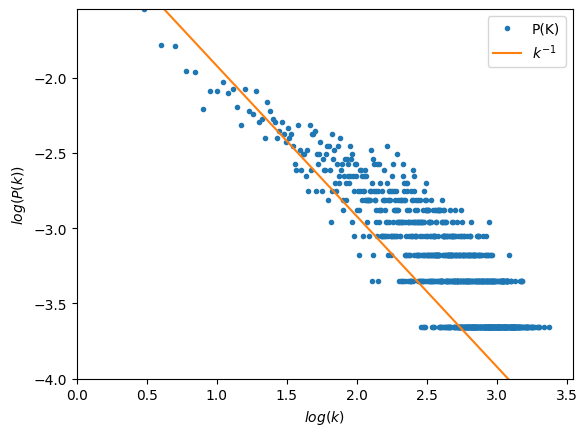

In [89]:
from math import log10
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, max_degree, 1000)
y = 0.12 * np.power(x, -1)

logx = np.log10(x)
logy = np.log10(y)

x2 = np.linspace(1, max_degree, 1000)
y2 = np.power(x, -2.5)

logx2 = np.log10(x2)
logy2 = np.log10(y2)


myx = np.linspace(1, max_degree, max_degree+1)

mylogx = np.log10(myx)
mylogy = np.log10(P_K)



plt.figure()
plt.plot(mylogx, mylogy, '.', label='P(K)')
plt.plot(logx, logy, label='$k^{-1}$')
# plt.plot(logx2, logy2)
plt.xlabel("$log(k)$")
plt.ylabel("$log(P(k))$")
plt.ylim(-4, max(mylogy))
plt.xlim(0)
# plt.title("Power-law Distribution")

plt.legend()
plt.show()


Community
link prediction -> Recomendation

## Link Analysis

### Link Importance

#### HITS

In [133]:
(hubs,authorities) = nx.hits(G)

In [134]:
dict(sorted(hubs.items(), key=lambda item: item[1], reverse=True))

{'818a07d4b1a085d65a3851c9f68f148d': 0.0013287563223899727,
 'bf2abe9a707f9581f8d32196958b6e05': 0.001256559334746987,
 '4bd30b70ee73e1caf2cb0753e4b6504f': 0.0012441301121966224,
 'cfe4738a5d926fc158d4fcb1287fe2c5': 0.0012293676164307678,
 'fc42cbb17f863f27ab7b8b231ef6e49a': 0.001222836795813433,
 '2a0bca8d74bf6811e6c44df3f8ea0761': 0.0011971187217868719,
 '890fe00be33e1e5dc34a076343cfa15a': 0.001187979444993648,
 'fa56c37387610a09380020f3a57d4629': 0.001185503262727406,
 'cf8c1773ea4ff67cf2eca21761fd8345': 0.0011602841253297508,
 '69d6de82682308ae18acf638799094f5': 0.0011532955265262566,
 'dceb4807abd7b25483354deaf817abe2': 0.0011492920521197136,
 '31af83257723e6cd61e4b09371ea9cf1': 0.0011417228859511108,
 '307a9162351905aa4a88488ccc1bef37': 0.0011296976592635563,
 '1f07a083b9765d480e5fc06a63e6f129': 0.001122167928005283,
 '9b807c0a39521f5c3ab0a3bc0e5f8851': 0.0011204588339191086,
 '8ec35dc892073f19e6583879f7206342': 0.0011148925537950675,
 'bded0233fcc6f1bdd59726f24c7f3688': 0.001112

In [135]:
dict(sorted(authorities.items(), key=lambda item: item[1], reverse=True))

{'818a07d4b1a085d65a3851c9f68f148d': 0.0013287563223899769,
 'bf2abe9a707f9581f8d32196958b6e05': 0.0012565593347469894,
 '4bd30b70ee73e1caf2cb0753e4b6504f': 0.0012441301121966237,
 'cfe4738a5d926fc158d4fcb1287fe2c5': 0.0012293676164307668,
 'fc42cbb17f863f27ab7b8b231ef6e49a': 0.001222836795813435,
 '2a0bca8d74bf6811e6c44df3f8ea0761': 0.0011971187217868727,
 '890fe00be33e1e5dc34a076343cfa15a': 0.0011879794449936463,
 'fa56c37387610a09380020f3a57d4629': 0.001185503262727407,
 'cf8c1773ea4ff67cf2eca21761fd8345': 0.0011602841253297502,
 '69d6de82682308ae18acf638799094f5': 0.001153295526526259,
 'dceb4807abd7b25483354deaf817abe2': 0.001149292052119714,
 '31af83257723e6cd61e4b09371ea9cf1': 0.0011417228859511117,
 '307a9162351905aa4a88488ccc1bef37': 0.001129697659263558,
 '1f07a083b9765d480e5fc06a63e6f129': 0.0011221679280052838,
 '9b807c0a39521f5c3ab0a3bc0e5f8851': 0.001120458833919109,
 '8ec35dc892073f19e6583879f7206342': 0.0011148925537950662,
 'bded0233fcc6f1bdd59726f24c7f3688': 0.0011127

#### Page Rank

In [136]:
pr = nx.pagerank(G)

In [137]:
dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))

{'818a07d4b1a085d65a3851c9f68f148d': 0.0017953714729810272,
 'fc42cbb17f863f27ab7b8b231ef6e49a': 0.0017107059402961522,
 '2a0bca8d74bf6811e6c44df3f8ea0761': 0.0014958863898261743,
 'bf2abe9a707f9581f8d32196958b6e05': 0.0014081002555232335,
 'cfe4738a5d926fc158d4fcb1287fe2c5': 0.0013828929212075089,
 '31af83257723e6cd61e4b09371ea9cf1': 0.0013519304780141405,
 '16bcc03cb29d0950f52a897ceaf8eb6e': 0.0013457673578387258,
 '7d310f25dd8e24af00e7ef6857c19a7b': 0.0013205384785736252,
 '4bd30b70ee73e1caf2cb0753e4b6504f': 0.001310541802759259,
 '69d6de82682308ae18acf638799094f5': 0.0012754810503393704,
 'dceb4807abd7b25483354deaf817abe2': 0.001267239067123674,
 '890fe00be33e1e5dc34a076343cfa15a': 0.0012655268182206849,
 'bded0233fcc6f1bdd59726f24c7f3688': 0.0012388495553795529,
 'fa56c37387610a09380020f3a57d4629': 0.0011999537464929674,
 '04bbadd525a062622b18b7d42edd8619': 0.0011915866585822529,
 'cf8c1773ea4ff67cf2eca21761fd8345': 0.0011768762858449268,
 '00b5b129cc3cfa6511418cce1cec54ab': 0.001

In [138]:
G.degree(['818a07d4b1a085d65a3851c9f68f148d', '7ddb7cd66031a983e696cd0627d80a21'])

DegreeView({'818a07d4b1a085d65a3851c9f68f148d': 2360})

In [203]:
# !!pip install pybind11
!! python -m pip install graph-walker==1.0.6

['Collecting graph-walker==1.0.6',
 '  Using cached graph-walker-1.0.6.tar.gz (6.5 kB)',
 '  Preparing metadata (setup.py): started',
 "  Preparing metadata (setup.py): finished with status 'done'",
 'Requirement already satisfied: networkx in c:\\users\\rezaab\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from graph-walker==1.0.6) (3.2.1)',
 'Requirement already satisfied: numpy in c:\\users\\rezaab\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from graph-walker==1.0.6) (1.26.4)',
 'Requirement already satisfied: scipy in c:\\users\\rezaab\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from graph-walker==1.0.6) (1.12.0)',
 'Requirement already satisfied: pybind11 in c:\\users\\rezaab\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from graph-walker==1.0.6) (2.11.1)',
 'Requirement already satisfied: scikit-learn in c:\\users\\rezaab\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from graph-

In [173]:
import walker

X = walker.random_walks(G, n_walks=50, walk_len=25, start_nodes=[0, 1, 2])

ModuleNotFoundError: No module named 'walker'

### Link Prediction

In [16]:
def compute_accuracy(preds, n = 10000):
    preds = sorted(preds, reverse=True, key=lambda item: item[2])
    count = 0
    c = 0
    for pred in preds[:n]:
        c+=1
        if G_2017.has_edge(pred[0], pred[1]):
            count += 1
    print(count, c)
    return count

# def compute_accuracy(preds, n = 5):
#     preds = sorted(preds, reverse=True, key=lambda item: item[2])
#     count = 0
#     c = 0

#     for node in G.nodes():
#         node_preds = []
#         for p in preds:
#             if p[0] == node or p[1] == node:
#                 node_preds.append(p)
#                 if len(node_preds) >= n:
#                     break
                
#         for pred in node_preds[:n]:
#             c+=1
#             if G_2017.has_edge(pred[0], pred[1]):
#                 count += 1

#         if c%1000 == 0:
#             print(c)
#     print(count, c)
#     return count

# def compute_accuracy(preds, n = 20):
#     preds = sorted(preds, reverse=True, key=lambda item: item[2])
#     print('here')
#     newlist = {x:[y for y in preds if y[0]==x or y[1]==x] for x in G.nodes()}
#     print('here2')
#     count = 0
#     c = 0

#     for node_preds in newlist.values():
#         for pred in node_preds[:20]:
#             c+=1
#             if G_2017.has_edge(pred[0], pred[1]):
#                 count += 1

#         if c%1000 == 0:
#             print(c)
#     print(count, c)
#     return count

def genrator_to_list(iterator):
    count = 0
    ret = []
    for val in iterator:
        count+=1
        if count%10000==0:
            print(count/9553000)

        ret.append(val)
    return ret

In [140]:
preds = nx.jaccard_coefficient(G)
jaccard_preds = genrator_to_list(preds)
compute_accuracy(jaccard_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1189

In [25]:
preds = nx.adamic_adar_index(G)
adamic_adar_preds = genrator_to_list(preds)
compute_accuracy(adamic_adar_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1191

In [21]:
preds = nx.preferential_attachment(G)
pa_preds = genrator_to_list(preds)
compute_accuracy(pa_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1047

In [22]:
preds = nx.cn_soundarajan_hopcroft(G)
cn_preds = genrator_to_list(preds)
compute_accuracy(cn_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1368

In [23]:
simrank = nx.simrank_similarity(G)

In [24]:
sr_preds = []

for src, values in simrank.items():
    for target, value in values.items():
        sr_preds.append((src, target, value))

compute_accuracy(sr_preds)

654 10000


654